In [68]:
import pandas as pd
import numpy as np

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [432]:
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("E:\ShelfLife\shelf_life_data.csv")

In [74]:
data.head()

,Product_Type,Storage_Temperature,Humidity_Level,Packaging_Type,Production_Date,Spoilage_Date,Spoilage_Days
0,Meat,0.835249,45.130919,Glass,2023-01-01,2023-01-29,28
1,Bakery,2.111259,42.223044,Plastic,2023-01-02,2023-01-23,21
2,Dairy,7.524683,50.423090,NaN,2023-01-03,2023-01-30,27
3,Bakery,0.512938,58.594077,Paper,2023-01-04,2023-01-31,27
4,Bakery,4.925354,47.763931,Glass,2023-01-05,2023-02-06,32


In [76]:
data["Packaging_Type"] = data["Packaging_Type"].fillna(data["Packaging_Type"].mode()[0])

In [78]:
data.head()

,Product_Type,Storage_Temperature,Humidity_Level,Packaging_Type,Production_Date,Spoilage_Date,Spoilage_Days
0,Meat,0.835249,45.130919,Glass,2023-01-01,2023-01-29,28
1,Bakery,2.111259,42.223044,Plastic,2023-01-02,2023-01-23,21
2,Dairy,7.524683,50.423090,Paper,2023-01-03,2023-01-30,27
3,Bakery,0.512938,58.594077,Paper,2023-01-04,2023-01-31,27
4,Bakery,4.925354,47.763931,Glass,2023-01-05,2023-02-06,32


In [80]:
#data.isnull().sum()

In [84]:
n1 = data.copy()

In [86]:
n1.shape

(5000, 7)

In [90]:
n1

,Product_Type,Storage_Temperature,Humidity_Level,Packaging_Type,Production_Date,Spoilage_Date,Spoilage_Days
0,Meat,0.835249,45.130919,Glass,2023-01-01,2023-01-29,28
1,Bakery,2.111259,42.223044,Plastic,2023-01-02,2023-01-23,21
2,Dairy,7.524683,50.423090,Paper,2023-01-03,2023-01-30,27
3,Bakery,0.512938,58.594077,Paper,2023-01-04,2023-01-31,27
4,Bakery,4.925354,47.763931,Glass,2023-01-05,2023-02-06,32
...,...,...,...,...,...,...,...
4995,Meat,6.965072,52.745203,Glass,2036-09-04,2036-10-03,29
4996,Meat,3.760418,30.575138,Paper,2036-09-05,2036-10-08,33
4997,Bakery,9.426097,47.030769,Paper,2036-09-06,2036-10-06,30
4998,Meat,8.179848,37.157975,Glass,2036-09-07,2036-10-06,29


In [94]:
n1.drop(["Spoilage_Date","Production_Date"],axis = 1 ,inplace = True)

In [96]:
n1

,Product_Type,Storage_Temperature,Humidity_Level,Packaging_Type,Spoilage_Days
0,Meat,0.835249,45.130919,Glass,28
1,Bakery,2.111259,42.223044,Plastic,21
2,Dairy,7.524683,50.423090,Paper,27
3,Bakery,0.512938,58.594077,Paper,27
4,Bakery,4.925354,47.763931,Glass,32
...,...,...,...,...,...
4995,Meat,6.965072,52.745203,Glass,29
4996,Meat,3.760418,30.575138,Paper,33
4997,Bakery,9.426097,47.030769,Paper,30
4998,Meat,8.179848,37.157975,Glass,29


In [102]:
n1 = pd.get_dummies(n1, columns=["Product_Type", "Packaging_Type"], dtype=int)


In [104]:
n1.head()

,Storage_Temperature,Humidity_Level,Spoilage_Days,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,28,0,0,0,1,0,1,0,0
1,2.111259,42.223044,21,1,0,0,0,0,0,0,1
2,7.524683,50.423090,27,0,1,0,0,0,0,1,0
3,0.512938,58.594077,27,1,0,0,0,0,0,1,0
4,4.925354,47.763931,32,1,0,0,0,0,1,0,0


In [106]:
X = n1.drop(["Spoilage_Days"],axis = 1)
y = n1["Spoilage_Days"]

In [108]:
X.head()

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,0,0,0,1,0,1,0,0
1,2.111259,42.223044,1,0,0,0,0,0,0,1
2,7.524683,50.423090,0,1,0,0,0,0,1,0
3,0.512938,58.594077,1,0,0,0,0,0,1,0
4,4.925354,47.763931,1,0,0,0,0,1,0,0


In [124]:
y.head()

0    28
1    21
2    27
3    27
4    32
Name: Spoilage_Days, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
model = LinearRegression()
model

LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression()

In [116]:
#n_data.drop(["Spoilage_Date"],axis = 1, inplace = True)

In [118]:
n1

,Storage_Temperature,Humidity_Level,Spoilage_Days,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,28,0,0,0,1,0,1,0,0
1,2.111259,42.223044,21,1,0,0,0,0,0,0,1
2,7.524683,50.423090,27,0,1,0,0,0,0,1,0
3,0.512938,58.594077,27,1,0,0,0,0,0,1,0
4,4.925354,47.763931,32,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,6.965072,52.745203,29,0,0,0,1,0,1,0,0
4996,3.760418,30.575138,33,0,0,0,1,0,0,1,0
4997,9.426097,47.030769,30,1,0,0,0,0,0,1,0
4998,8.179848,37.157975,29,0,0,0,1,0,1,0,0


In [132]:
y_pred = model.predict(X_test)

In [368]:
mae_dt = mean_absolute_error(y_test, y_pred)
mae_dt

4.285861647718286

In [374]:
mse_lr = mean_squared_error(y_test, y_pred)
mse_lr

29.320791476772587

In [376]:
r2_lr = r2_score(y_test, y_pred)
r2_lr

-0.009131063752804591

In [140]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:"y_pred"},inplace = True)
y_pred.head()

,y_pred
0,30.247436
1,30.018705
2,30.769204
3,30.105329
4,30.476912


In [142]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True)

In [144]:
y_test.drop(["index"],inplace = True,axis = 1)

In [146]:
y_test

,Spoilage_Days
0,27
1,27
2,34
3,23
4,34
...,...
995,29
996,25
997,26
998,27


In [148]:
#X_test.reset_index(inplace = True)

In [152]:
#X_test.drop(["level_0","index"],axis = 1 ,inplace = True)

In [154]:
Final_n_data = pd.concat([X_test,y_test,y_pred],axis = 1)

In [177]:
#X_test.reset_index(inplace = True)
#X_test.drop(["level_0","index"],axis = 1,inplace = True) 

In [181]:
X_test.drop(["level_0","index"],axis = 1 ,inplace = True)

In [183]:
X_test

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,7.517982,30.540340,0,0,0,0,1,0,0,1
1,9.200382,68.829574,0,1,0,0,0,1,0,0
2,8.947476,73.637549,0,0,0,1,0,0,0,1
3,6.024692,67.161078,0,1,0,0,0,0,1,0
4,8.799146,63.121090,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0
996,7.779094,36.963208,0,0,0,0,1,0,1,0
997,9.339874,34.101103,1,0,0,0,0,0,0,1
998,8.275812,59.606657,0,0,1,0,0,0,0,1


In [185]:
a = Final_n_data["Spoilage_Days"].sum() 
a

29746.0

In [187]:
b = Final_n_data["y_pred"].sum() 
b

30050.91584752821

In [189]:
c = a - b
c

-304.91584752820927

In [207]:
y_pred.head()

,y_pred
0,30.247436
1,30.018705
2,30.769204
3,30.105329
4,30.476912


In [209]:
Final_n_data = pd.concat([X_test,y_test,y_pred],axis = 1)

In [213]:
Final_n_data["y_pred"] = Final_n_data["y_pred"].astype(int)

In [215]:
Final_n_data

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic,Spoilage_Days,y_pred
0,7.517982,30.540340,0,0,0,0,1,0,0,1,27,30
1,9.200382,68.829574,0,1,0,0,0,1,0,0,27,30
2,8.947476,73.637549,0,0,0,1,0,0,0,1,34,30
3,6.024692,67.161078,0,1,0,0,0,0,1,0,23,30
4,8.799146,63.121090,0,0,0,1,0,1,0,0,34,30
...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0,29,30
996,7.779094,36.963208,0,0,0,0,1,0,1,0,25,30
997,9.339874,34.101103,1,0,0,0,0,0,0,1,26,30
998,8.275812,59.606657,0,0,1,0,0,0,0,1,27,30


In [219]:
n2 = n1.copy()

In [223]:
n2.head()

,Storage_Temperature,Humidity_Level,Spoilage_Days,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,28,0,0,0,1,0,1,0,0
1,2.111259,42.223044,21,1,0,0,0,0,0,0,1
2,7.524683,50.423090,27,0,1,0,0,0,0,1,0
3,0.512938,58.594077,27,1,0,0,0,0,0,1,0
4,4.925354,47.763931,32,1,0,0,0,0,1,0,0


In [231]:
n2.shape

(5000, 11)

In [233]:
n2.head()

,Storage_Temperature,Humidity_Level,Spoilage_Days,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,28,0,0,0,1,0,1,0,0
1,2.111259,42.223044,21,1,0,0,0,0,0,0,1
2,7.524683,50.423090,27,0,1,0,0,0,0,1,0
3,0.512938,58.594077,27,1,0,0,0,0,0,1,0
4,4.925354,47.763931,32,1,0,0,0,0,1,0,0


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [257]:
ndt = n2.copy()

In [259]:
X_dt = ndt.drop(["Spoilage_Days"],axis = 1)
y_dt = ndt["Spoilage_Days"]

In [261]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [263]:
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(random_state=42)

In [273]:
y_pred_dt = dt_regressor.predict(X_test_dt)
y_pred_dt = pd.DataFrame(y_pred_dt)
y_pred_dt.rename(columns={0:"y_pred_dt"},inplace = True)

In [275]:
y_pred_dt.head()

,y_pred_dt
0,31.0
1,31.0
2,23.0
3,30.0
4,21.0


In [298]:
#X_test_dt.reset_index(inplace = True)

In [302]:
X_test_dt.drop(["level_0","index"],axis = 1 , inplace = True)

In [304]:
X_test_dt

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,7.517982,30.540340,0,0,0,0,1,0,0,1
1,9.200382,68.829574,0,1,0,0,0,1,0,0
2,8.947476,73.637549,0,0,0,1,0,0,0,1
3,6.024692,67.161078,0,1,0,0,0,0,1,0
4,8.799146,63.121090,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0
996,7.779094,36.963208,0,0,0,0,1,0,1,0
997,9.339874,34.101103,1,0,0,0,0,0,0,1
998,8.275812,59.606657,0,0,1,0,0,0,0,1


In [318]:
y_test_dt = pd.DataFrame(y_test_dt)

In [324]:
y_test_dt.reset_index(inplace = True)

In [328]:
y_test_dt.drop(["index"],axis =1 , inplace = True)

In [330]:
y_test_dt.head()

,Spoilage_Days
0,27
1,27
2,34
3,23
4,34


In [332]:
Decison_Tree_Final = pd.concat([X_test_dt,y_test_dt,y_pred_dt],axis = 1)

In [336]:
Decison_Tree_Final["y_pred_dt"] = Decison_Tree_Final["y_pred_dt"].astype(int)

In [340]:
Decison_Tree_Final.head()

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic,Spoilage_Days,y_pred_dt
0,7.517982,30.540340,0,0,0,0,1,0,0,1,27,31
1,9.200382,68.829574,0,1,0,0,0,1,0,0,27,31
2,8.947476,73.637549,0,0,0,1,0,0,0,1,34,23
3,6.024692,67.161078,0,1,0,0,0,0,1,0,23,30
4,8.799146,63.121090,0,0,0,1,0,1,0,0,34,21


In [378]:
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
mse_dt

60.078

In [384]:
r2_dt= r2_score(y_test_dt, y_pred_dt)
r2_dt

-1.0676991648117102

In [350]:
feature_importance = pd.Series(dt_regressor.feature_importances_, index=X.columns)

In [354]:
feature_importance*100

Storage_Temperature       40.845466
Humidity_Level            41.296652
Product_Type_Bakery        2.538804
Product_Type_Dairy         2.667437
Product_Type_Fruit         2.336725
Product_Type_Meat          0.775248
Product_Type_Vegetable     2.085168
Packaging_Type_Glass       2.063102
Packaging_Type_Paper       2.318243
Packaging_Type_Plastic     3.073155
dtype: float64

In [356]:
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_regressor.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [360]:
from sklearn.metrics import accuracy_score

In [366]:
accuracy = accuracy_score(y_test_dt, y_pred_dt)
accuracy*100

5.4

In [386]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [390]:
n3 = n2.copy()

In [392]:
n3.copy()

,Storage_Temperature,Humidity_Level,Spoilage_Days,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,0.835249,45.130919,28,0,0,0,1,0,1,0,0
1,2.111259,42.223044,21,1,0,0,0,0,0,0,1
2,7.524683,50.423090,27,0,1,0,0,0,0,1,0
3,0.512938,58.594077,27,1,0,0,0,0,0,1,0
4,4.925354,47.763931,32,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,6.965072,52.745203,29,0,0,0,1,0,1,0,0
4996,3.760418,30.575138,33,0,0,0,1,0,0,1,0
4997,9.426097,47.030769,30,1,0,0,0,0,0,1,0
4998,8.179848,37.157975,29,0,0,0,1,0,1,0,0


In [394]:
X_rf = n3.drop(columns=['Spoilage_Days'])
y_rf = n3['Spoilage_Days'] 

In [396]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [400]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier

RandomForestClassifier(random_state=42)

In [404]:
rf_classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [408]:
y_pred_rf = rf_classifier.predict(X_test_rf)
y_pred_rf

array([31, 26, 27, 30, 34, 15, 31, 35, 38, 35, 33, 30, 28, 31, 27, 25, 32,
       25, 28, 38, 34, 35, 30, 27, 29, 23, 30, 37, 28, 43, 31, 28, 26, 35,
       34, 29, 31, 35, 34, 28, 34, 27, 33, 28, 26, 24, 16, 32, 36, 17, 18,
       37, 26, 27, 29, 28, 30, 36, 32, 28, 31, 31, 30, 29, 31, 26, 33, 27,
       30, 31, 25, 29, 29, 29, 33, 33, 32, 37, 27, 17, 29, 28, 30, 27, 35,
       32, 35, 21, 30, 29, 30, 26, 22, 40, 20, 28, 34, 24, 27, 31, 31, 42,
       33, 25, 29, 41, 30, 30, 32, 33, 22, 26, 29, 27, 24, 29, 23, 29, 17,
       30, 27, 28, 21, 34, 23, 29, 27, 31, 33, 26, 29, 37, 38, 29, 25, 40,
       28, 28, 27, 35, 20, 37, 30, 33, 31, 19, 26, 25, 32, 42, 19, 20, 22,
       31, 32, 37, 38, 27, 31, 40, 33, 27, 38, 29, 33, 25, 33, 22, 31, 37,
       37, 39, 29, 20, 33, 31, 35, 36, 31, 29, 33, 32, 30, 31, 26, 35, 21,
       22, 32, 31, 38, 29, 27, 31, 25, 33, 24, 19, 28, 44, 31, 38, 34, 29,
       35, 28, 33, 29, 23, 28, 26, 26, 33, 19, 16, 31, 31, 33, 29, 31, 28,
       30, 34, 24, 28, 27

In [412]:
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
accuracy_rf*100

6.2

In [419]:
performance = {}

d = [1,10,20,50,100,150,200,300,500,1000]
for n in d:
    rf_classifier = RandomForestClassifier(n_estimators = n)
    #fit the model 
    rf_classifier.fit(X_train_rf,y_train_rf)

    #predict the Test set results 
    y_pred_rf = rf_classifier.predict(X_test_rf)

    #choice accuracy score 
    accuracy_rf = accuracy_score(y_test_rf,y_pred_rf)
    performance[n] = accuracy_rf

performance

{1: 0.047,
 10: 0.045,
 20: 0.065,
 50: 0.055,
 100: 0.053,
 150: 0.056,
 200: 0.051,
 300: 0.051,
 500: 0.054,
 1000: 0.055}

In [424]:
performance

{1: 0.047,
 10: 0.045,
 20: 0.065,
 50: 0.055,
 100: 0.053,
 150: 0.056,
 200: 0.051,
 300: 0.051,
 500: 0.054,
 1000: 0.055}

In [426]:
ntrees = performance.keys()
ntrees

dict_keys([1, 10, 20, 50, 100, 150, 200, 300, 500, 1000])

In [428]:
accuracies = performance.values()

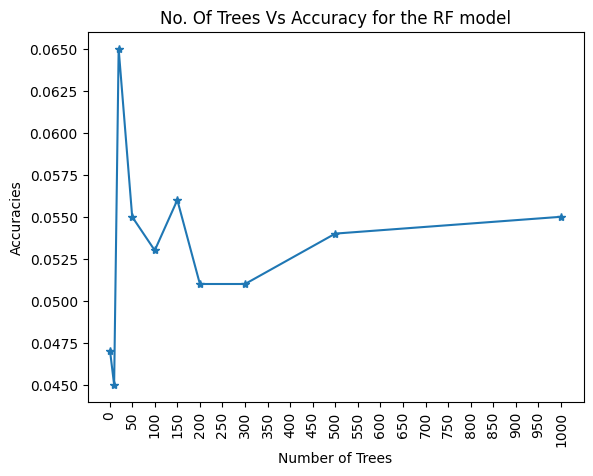

In [434]:
plt.plot(ntrees,accuracies,marker = "*")
plt.xlabel("Number of Trees")
plt.xticks(np.arange(0,1001,50),rotation = 90)
plt.ylabel("Accuracies")
plt.title("No. Of Trees Vs Accuracy for the RF model")
plt.show()

In [438]:
fi = rf_classifier.feature_importances_
fi

array([0.47521558, 0.47385206, 0.00691894, 0.0061435 , 0.00699331,
       0.00612294, 0.00665113, 0.00586542, 0.00643489, 0.00580221])

In [440]:
cols = X_train_rf.columns
cols

Index(['Storage_Temperature', 'Humidity_Level', 'Product_Type_Bakery',
       'Product_Type_Dairy', 'Product_Type_Fruit', 'Product_Type_Meat',
       'Product_Type_Vegetable', 'Packaging_Type_Glass',
       'Packaging_Type_Paper', 'Packaging_Type_Plastic'],
      dtype='object')

<BarContainer object of 10 artists>

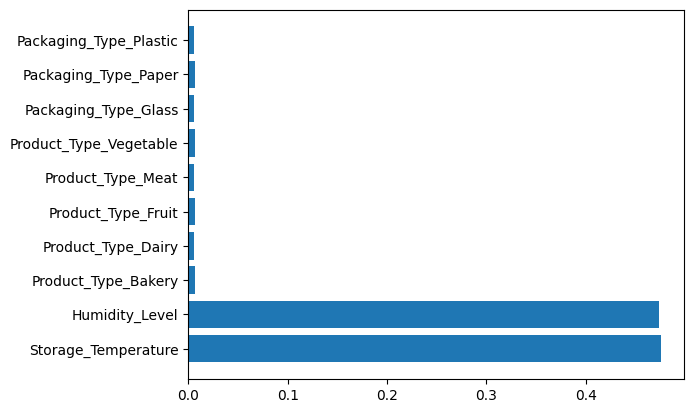

In [442]:
plt.barh(cols,fi)

In [444]:
rf_classifier = RandomForestClassifier(n_estimators = 250)
    #fit the model 
rf_classifier.fit(X_train_rf,y_train_rf)

 #predict the Test set results 
y_pred_rf = rf_classifier.predict(X_test_rf)

    #choice accuracy score 
accuracy_rf = accuracy_score(y_test_rf,y_pred_rf)

In [446]:
y_pred_rf

array([33, 31, 27, 30, 35, 28, 31, 35, 38, 35, 33, 30, 28, 31, 29, 34, 32,
       25, 29, 38, 34, 35, 30, 27, 29, 23, 30, 37, 21, 43, 31, 28, 26, 35,
       34, 29, 31, 35, 40, 28, 34, 27, 33, 28, 26, 24, 16, 32, 38, 25, 18,
       37, 26, 26, 29, 28, 30, 36, 32, 28, 31, 31, 30, 29, 31, 26, 33, 27,
       29, 31, 25, 29, 29, 29, 33, 33, 32, 37, 27, 38, 29, 28, 30, 27, 35,
       32, 35, 21, 26, 29, 30, 20, 36, 26, 20, 28, 34, 24, 27, 31, 31, 42,
       33, 23, 29, 41, 30, 29, 32, 33, 22, 26, 29, 30, 24, 34, 23, 29, 17,
       30, 27, 28, 21, 34, 24, 29, 27, 31, 19, 26, 29, 32, 38, 29, 35, 40,
       28, 28, 27, 26, 27, 37, 30, 33, 31, 28, 26, 25, 32, 42, 19, 25, 30,
       31, 32, 37, 38, 27, 31, 40, 33, 27, 38, 29, 33, 25, 33, 22, 31, 37,
       37, 39, 29, 20, 33, 31, 35, 36, 31, 29, 33, 19, 30, 30, 26, 35, 22,
       23, 32, 31, 29, 37, 27, 31, 25, 33, 24, 35, 28, 44, 31, 38, 34, 29,
       35, 28, 33, 29, 23, 28, 29, 26, 33, 19, 16, 31, 31, 33, 29, 31, 28,
       30, 34, 24, 28, 27

In [452]:
accuracy_rf

0.051

In [466]:
#X_test_rf.reset_index(inplace = True)

In [470]:
X_test_rf.drop(["level_0","index"],axis = 1 ,inplace = True)

In [472]:
X_test_rf

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,7.517982,30.540340,0,0,0,0,1,0,0,1
1,9.200382,68.829574,0,1,0,0,0,1,0,0
2,8.947476,73.637549,0,0,0,1,0,0,0,1
3,6.024692,67.161078,0,1,0,0,0,0,1,0
4,8.799146,63.121090,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0
996,7.779094,36.963208,0,0,0,0,1,0,1,0
997,9.339874,34.101103,1,0,0,0,0,0,0,1
998,8.275812,59.606657,0,0,1,0,0,0,0,1


In [480]:
y_test_rf = pd.DataFrame(y_test_rf)
y_test_rf.reset_index()

,index,Spoilage_Days
0,1501,27
1,2586,27
2,2653,34
3,1055,23
4,705,34
...,...,...
995,4711,29
996,2313,25
997,3214,26
998,2732,27


In [492]:
y_test_rf.reset_index(inplace = True)

In [490]:
y_test_rf.reset_index(inplace = True)

In [496]:
y_test_rf.drop(["level_0","index"],axis = 1 , inplace = True)

In [498]:
y_test_rf

,Spoilage_Days
0,27
1,27
2,34
3,23
4,34
...,...
995,29
996,25
997,26
998,27


In [526]:
random_forest_final = pd.concat([X_test_rf,y_test_rf,y_pred_rf],axis = 1)
random_forest_final

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic,Spoilage_Days,y_pred_rf
0,7.517982,30.540340,0,0,0,0,1,0,0,1,27,33
1,9.200382,68.829574,0,1,0,0,0,1,0,0,27,31
2,8.947476,73.637549,0,0,0,1,0,0,0,1,34,27
3,6.024692,67.161078,0,1,0,0,0,0,1,0,23,30
4,8.799146,63.121090,0,0,0,1,0,1,0,0,34,35
...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0,29,34
996,7.779094,36.963208,0,0,0,0,1,0,1,0,25,30
997,9.339874,34.101103,1,0,0,0,0,0,0,1,26,24
998,8.275812,59.606657,0,0,1,0,0,0,0,1,27,32


In [528]:
d = random_forest_final["Spoilage_Days"].sum()
d

29746

In [530]:
e = random_forest_final["y_pred_rf"].sum()
e

29901

In [534]:
h = d-e
h

-155

In [500]:
X_test_rf

,Storage_Temperature,Humidity_Level,Product_Type_Bakery,Product_Type_Dairy,Product_Type_Fruit,Product_Type_Meat,Product_Type_Vegetable,Packaging_Type_Glass,Packaging_Type_Paper,Packaging_Type_Plastic
0,7.517982,30.540340,0,0,0,0,1,0,0,1
1,9.200382,68.829574,0,1,0,0,0,1,0,0
2,8.947476,73.637549,0,0,0,1,0,0,0,1
3,6.024692,67.161078,0,1,0,0,0,0,1,0
4,8.799146,63.121090,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,8.283781,72.714225,0,0,0,1,0,1,0,0
996,7.779094,36.963208,0,0,0,0,1,0,1,0
997,9.339874,34.101103,1,0,0,0,0,0,0,1
998,8.275812,59.606657,0,0,1,0,0,0,0,1


In [504]:
y_test_rf

,Spoilage_Days
0,27
1,27
2,34
3,23
4,34
...,...
995,29
996,25
997,26
998,27


In [508]:
y_pred_rf = pd.DataFrame(y_pred_rf)

In [524]:
y_pred_rf.rename(columns = {0:"y_pred_rf"},inplace = True)
y_pred_rf

,y_pred_rf
0,33
1,31
2,27
3,30
4,35
...,...
995,34
996,30
997,24
998,32
